In [ ]:
# **Gatos vs Não-Gatos **

### Alunos:
    Antonio Silverio Montagner (19203742)
    Davi Becker da Silva (18206220)
    
Neste trabalho, será abordado o reconhecimento de padrões por meio do treinamento de uma rede neural. O objetivo é desenvolver um sistema capaz de identificar e classificar imagens de gatinhos como "gatos" ou "não-gatos".

Para isso, utilizaremos um conjunto de dados contendo imagens RGB, representadas por matrizes de 64x64x3 (4096 pixels coloridos). Essas imagens serão usadas como parâmetros de entrada para a rede neural.

O objetivo da rede é atribuir um valor de classificação correto para cada imagem, sendo que o valor 0 corresponderá a "não-gato" e o valor 1 corresponderá a "gato".

Para resolver esse problema, serão explorados três modelos diferentes: um perceptron simples (regressão logística), uma rede neural de camada rasa e uma rede neural convolucional. 
Cada modelo terá seu próprio processo de treinamento e teste, visando encontrar a melhor abordagem para a classificação precisa das imagens.

In [ ]:
# **Regressão Logística**
Inicialmente, abordaremos o problema utilizando apenas um perceptron, por meio de regressão logística.

In [ ]:
## Importando as bibliotecas e lendo os dados

In [7]:
# Importando bibliotecas
import numpy as np
import h5py
import matplotlib.pyplot as plt
 
# Carregando os dados
train_dataset = h5py.File('./train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels
 
test_dataset = h5py.File('./test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [ ]:
Para facilitar a visualização dos dados de treinamento, iremos representá-los em um gráfico. 

Tamanho da base de dados de treinamento: 209
train set shape: (209, 64, 64, 3)


Text(0, 0.5, 'Classe')

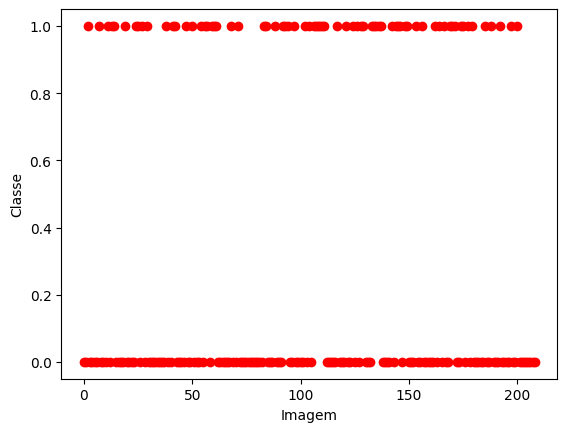

In [8]:
n = len(train_set_x_orig) # número de imagens
print('Tamanho da base de dados de treinamento:', n)
print('train set shape:', train_set_x_orig.shape)

plt.scatter(range(n),train_set_y_orig,c='red')
plt.xlabel('Imagem')
plt.ylabel('Classe')

In [ ]:
Nosso conjunto de dados consiste em 209 imagens de tamanho 64x64x3, classificadas como gatos (classe 1) ou não-gatos (classe 0).

In [ ]:
## Manipulando os dados
Antes de prosseguirmos, faremos um achatamento (flatten) nos vetores de teste e treinamento, além de normalizar os dados de entrada.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Transformando os arrays em arrays de 209 x 12288 (209 x (64 . 64 . 3))
train_set_x = np.array([array.flatten() for array in train_set_x_orig])
test_set_x = np.array([array.flatten() for array in test_set_x_orig])

# Normalizando o array de treino
norm_train_set_x = MinMaxScaler()
norm_train_set_x = norm_train_set_x.fit_transform(train_set_x)

In [3]:
## Modelando a regressão e realizando testes
Com as preparações feitas, iremos modelar a regressão logística e realizar alguns testes.

In [10]:
from sklearn.linear_model import LogisticRegression

# Treinando o modelo de regressão logística
clf = LogisticRegression(random_state=0, max_iter=10000).fit(norm_train_set_x, train_set_y_orig)

print(f'Acurácia sobre o arquivo de treino = {clf.score(train_set_x, train_set_y_orig) * 100}%')
print(f'Acurácia sobre o arquivo de testes = {clf.score(test_set_x, test_set_y_orig) * 100}%')

print('\nResultados esperados do arquivo de teste:', *test_set_y_orig)
print('Resultados obtidos do arquivo de teste:  ', *clf.predict(test_set_x))

Acurácia sobre o arquivo de treino = 100.0%
Acurácia sobre o arquivo de testes = 72.0%

Resultados esperados do arquivo de teste: 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
Resultados obtidos do arquivo de teste:   1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0


In [ ]:
Verificamos que o modelo criado obteve resultados satisfatórios, sendo capaz de identificar com precisão se uma determinada imagem é de um gato ou não em 72% das vezes.

In [ ]:
## Matriz de confusão
Com base nos resultados obtidos, construímos uma matriz de confusão para avaliar o desempenho do modelo em relação aos dados de teste.

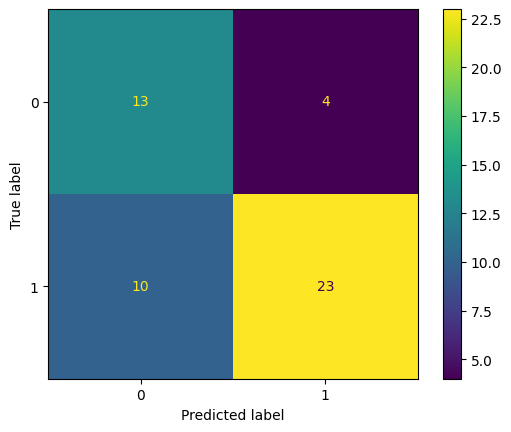

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, test_set_x, test_set_y_orig)

In [ ]:
# **Rede de Camada Rasa**
Visando obter um desempenho ainda melhor e resultados mais confiáveis, iremos implementar a classificação de imagens de gatinhos em um modelo mais robusto, com a expectativa de obter respostas mais precisas.


In [ ]:
## Importando as bibliotecas Keras e Tensorflow

In [14]:
from tensorflow import keras         # Importa Keras
from tensorflow.keras import layers  # Ferramentes do Keras mais usadas para acesso mais rápido
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
## Definindo as classes de classificação
Vamos utilizar duas classes:

*   0 - não-gatos
*   1 - gatos



In [15]:
train_set_y = to_categorical(train_set_y_orig, 2)
test_set_y = to_categorical(test_set_y_orig, 2)

In [ ]:
## Definindo um novo modelo
Para esta abordagem, vamos utilizar uma rede neural com apenas 3 camadas:
*   uma camada de entrada (*flatten*);
*   uma camada intermediária, composta por 1000 neurônios (com função de ativação sigmóide)
*   uma camada de saída, composta por 2 neurônios (com função de ativação *softmax*).


A rede utilizará o decaimento exponencial da taxa de aprendizado, além de pesos e *bias* aleatórios.

In [16]:
# Decaimento exponencial da taxa de aprendizado
def exp_decay(epoch):
   initial_lrate = 1.0
   k = 0.05
   lrate = initial_lrate * np.exp(-k*epoch)
   return lrate

lrate = keras.callbacks.LearningRateScheduler(exp_decay)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Definindo a rede
modelo = keras.Sequential()
modelo.add(layers.Flatten())
modelo.add(layers.Dense(1000, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="sigmoid"))
modelo.add(layers.Dense(2, kernel_initializer="random_uniform", bias_initializer="random_uniform", activation="softmax"))

opt = keras.optimizers.SGD()
modelo.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

input_shape = train_set_x.shape
modelo.build(input_shape)

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (209, 12288)              0         
                                                                 
 dense (Dense)               (209, 1000)               12289000  
                                                                 
 dense_1 (Dense)             (209, 2)                  2002      
                                                                 
Total params: 12,291,002
Trainable params: 12,291,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Criando um conjunto de validação
A fim de acompanhar o progresso da rede, faremos uso de um conjunto de validação composto por 63 fotos.

In [17]:
from sklearn.model_selection import train_test_split

Xtr,Xval,ytr,yval = train_test_split(norm_train_set_x,train_set_y,test_size = 0.3)
num_train = np.size(Xtr,0)
print(num_train)

146


In [ ]:
## Treinando o modelo
Agora, iremos treinar o modelo que foi criado, utilizando um tamanho de lote (batch size) de 30 e realizando 2000 épocas.

In [19]:
results = modelo.fit(Xtr, ytr, validation_data = (Xval, yval), batch_size = 30, epochs=2000, callbacks=[callback, lrate], verbose=2)

Epoch 1/2000
5/5 - 1s - loss: 5.8668 - accuracy: 0.6575 - val_loss: 14.1048 - val_accuracy: 0.6825 - lr: 1.0000 - 596ms/epoch - 119ms/step
Epoch 2/2000
5/5 - 0s - loss: 10.5108 - accuracy: 0.5548 - val_loss: 18.7739 - val_accuracy: 0.3175 - lr: 0.9512 - 465ms/epoch - 93ms/step
Epoch 3/2000
5/5 - 0s - loss: 9.1147 - accuracy: 0.5411 - val_loss: 13.7885 - val_accuracy: 0.3175 - lr: 0.9048 - 457ms/epoch - 91ms/step
Epoch 4/2000
5/5 - 0s - loss: 9.0811 - accuracy: 0.5342 - val_loss: 2.7697 - val_accuracy: 0.3016 - lr: 0.8607 - 466ms/epoch - 93ms/step
Epoch 5/2000
5/5 - 0s - loss: 7.7188 - accuracy: 0.5342 - val_loss: 2.9836 - val_accuracy: 0.6825 - lr: 0.8187 - 469ms/epoch - 94ms/step
Epoch 6/2000
5/5 - 0s - loss: 7.3719 - accuracy: 0.5068 - val_loss: 7.8240 - val_accuracy: 0.6825 - lr: 0.7788 - 461ms/epoch - 92ms/step
Epoch 7/2000
5/5 - 1s - loss: 4.5361 - accuracy: 0.5959 - val_loss: 8.5230 - val_accuracy: 0.6825 - lr: 0.7408 - 523ms/epoch - 105ms/step
Epoch 8/2000
5/5 - 0s - loss: 6.400

In [ ]:
## Desempenho do aprendizado
Podemos observar, por meio de um gráfico, o desempenho do aprendizado ao longo das épocas, representando a acurácia do modelo para os conjuntos de treinamento e validação, bem como o valor da função de custo.

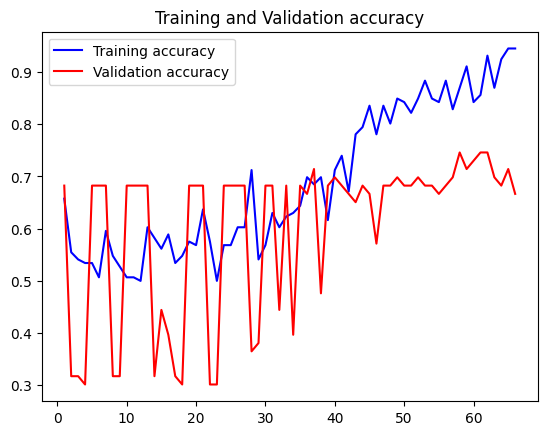

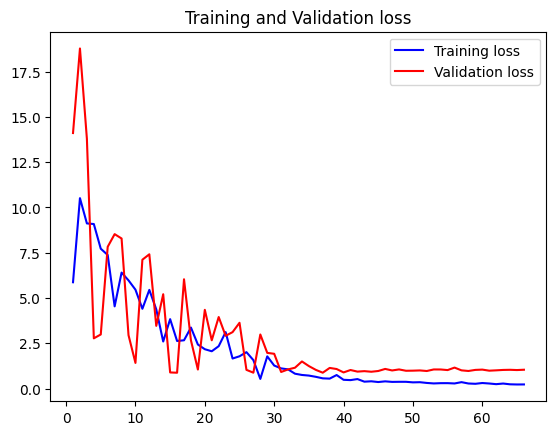

In [20]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label= 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label= 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label= 'Training loss')
plt.plot(epochs, val_loss, 'r', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
## Desempenho da rede
Após configurar e treinar a rede, realizaremos testes de desempenho para avaliar o funcionamento do modelo.

In [21]:
from sklearn.metrics import accuracy_score

ytrainpred = modelo.predict(train_set_x)
ytestpred = modelo.predict(test_set_x)

print('Acurácia sobre o arquivo de treino = {:.1f}%'.format(accuracy_score(train_set_y.argmax(axis=1), ytrainpred.argmax(axis=1)) * 100))
print('Acurácia sobre o arquivo de testes = {:.1f}%'.format(accuracy_score(test_set_y.argmax(axis=1), ytestpred.argmax(axis=1)) * 100))

print('\nResultados esperados do arquivo de teste:', *test_set_y_orig)
print('Resultados obtidos do arquivo de teste:  ', *[ytestpred[x].argmax() for x in range(len(ytestpred))])

2/2 [==============================] - 0s 19ms/step
Acurácia sobre o arquivo de treino = 88.5%
Acurácia sobre o arquivo de testes = 74.0%

Resultados esperados do arquivo de teste: 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
Resultados obtidos do arquivo de teste:   1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0


In [ ]:
## Matriz de confusão
Com base nos resultados obtidos, será possível construir uma matriz de confusão, que mostrará o desempenho do modelo em relação à base de dados de teste.

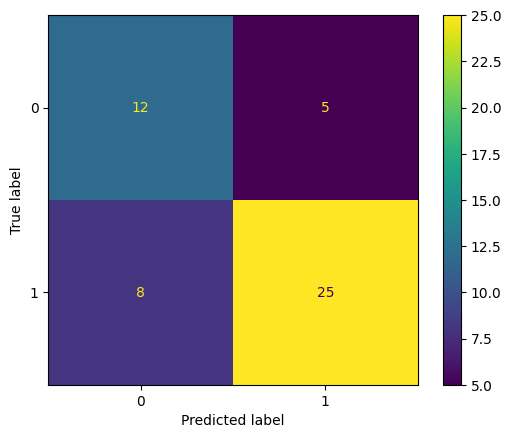

In [22]:
ConfusionMatrixDisplay.from_predictions(test_set_y.argmax(axis=1), ytestpred.argmax(axis=1))

In [ ]:
# **Rede Convolucional**
Agora, vamos utilizar um modelo mais robusto para identificação de imagens.

In [ ]:
## Criando um conjunto de validação
Novamente, faremos uso de um conjunto de validação, desta vez com 21 fotos.

In [23]:
Xtr,Xval,ytr,yval = train_test_split(train_set_x_orig,train_set_y,test_size = 0.1)
num_train = np.size(Xtr,0)
print(num_train)

188


In [ ]:
## Definindo um novo modelo
Para esta abordagem, vamos utilizar uma rede neural com 21 camadas:
*   4 camadas de convolução, com ativação *relu*;
*   9 camadas de normalização do *batch*
*   4 camadas de *pooling*;
*   1 camada *flatten*
*   1 camada de *dropout*;
*   2 camadas NN densas.

In [24]:
model_cnn = keras.Sequential(
    [
        keras.Input(shape=(64,64,3)),
        layers.Conv2D(32, (3,3), activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation = 'relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512,activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(2,activation='softmax'),
    ]
)

model_cnn.compile(
  loss='categorical_crossentropy',
  optimizer='adagrad',
  metrics=['accuracy'],
)
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 31, 31, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                      

In [ ]:
## Treinando o modelo
Agora treinaremos o modelo criado, utilizando um *batch_size* de tamanho 16 e 100 épocas.

In [25]:
# Callback
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model_cnn.fit(
  Xtr,
  ytr,
  epochs=100,
  batch_size=16,
  validation_data=(Xval, yval),
  verbose = 2,
  callbacks=[early_stop]
)

Epoch 1/100
12/12 - 5s - loss: 0.8450 - accuracy: 0.5745 - val_loss: 0.6738 - val_accuracy: 0.5714 - 5s/epoch - 386ms/step
Epoch 2/100
12/12 - 2s - loss: 0.6400 - accuracy: 0.7181 - val_loss: 0.6738 - val_accuracy: 0.5714 - 2s/epoch - 128ms/step
Epoch 3/100
12/12 - 2s - loss: 0.6590 - accuracy: 0.6702 - val_loss: 0.6316 - val_accuracy: 0.5714 - 2s/epoch - 130ms/step
Epoch 4/100
12/12 - 1s - loss: 0.6297 - accuracy: 0.7394 - val_loss: 0.6401 - val_accuracy: 0.5714 - 1s/epoch - 117ms/step
Epoch 5/100
12/12 - 1s - loss: 0.5895 - accuracy: 0.7128 - val_loss: 0.6206 - val_accuracy: 0.5714 - 1s/epoch - 118ms/step
Epoch 6/100
12/12 - 2s - loss: 0.4083 - accuracy: 0.8138 - val_loss: 0.6003 - val_accuracy: 0.5238 - 2s/epoch - 130ms/step
Epoch 7/100
12/12 - 2s - loss: 0.4781 - accuracy: 0.7766 - val_loss: 0.5559 - val_accuracy: 0.6190 - 2s/epoch - 131ms/step
Epoch 8/100
12/12 - 2s - loss: 0.4242 - accuracy: 0.8032 - val_loss: 0.5590 - val_accuracy: 0.6667 - 2s/epoch - 141ms/step
Epoch 9/100
12/1

In [ ]:
## Desempenho do aprendizado
Será possível visualizar o desempenho do aprendizado ao longo das épocas por meio de um gráfico.

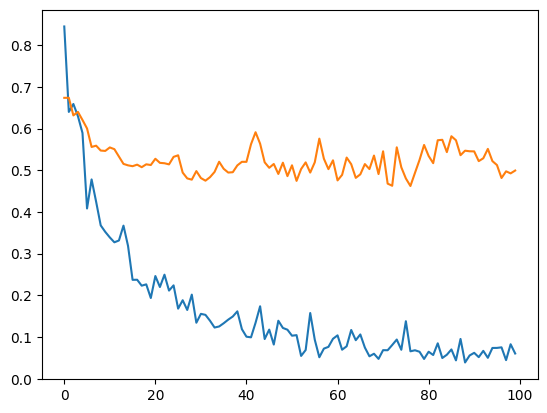

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

In [ ]:
## Desempenho da rede
Após configurar e treinar a rede, realizaremos testes de desempenho para avaliar o funcionamento do modelo.

In [29]:
ytrainpred = model_cnn.predict(train_set_x_orig)
ytestpred = model_cnn.predict(test_set_x_orig)

print('Acurácia sobre o arquivo de treino = {:.1f}%'.format(accuracy_score(train_set_y.argmax(axis=1), ytrainpred.argmax(axis=1)) * 100))
print('Acurácia sobre o arquivo de testes = {:.1f}%'.format(accuracy_score(test_set_y.argmax(axis=1), ytestpred.argmax(axis=1)) * 100))

print('\nResultados esperados do arquivo de teste:', *test_set_y_orig)
print('Resultados obtidos do arquivo de teste:  ', *[ytestpred[x].argmax() for x in range(len(ytestpred))])

2/2 [==============================] - 0s 34ms/step
Acurácia sobre o arquivo de treino = 97.6%
Acurácia sobre o arquivo de testes = 88.0%

Resultados esperados do arquivo de teste: 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
Resultados obtidos do arquivo de teste:   1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0


In [ ]:
## Matriz de confusão
Com base nos resultados obtidos, construiremos uma matriz de confusão para analisar o desempenho do modelo em relação aos dados de teste.


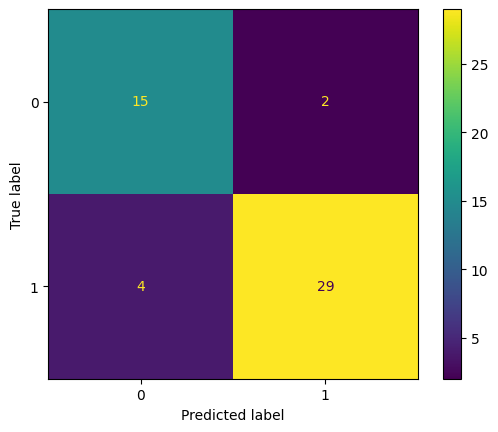

In [30]:
ConfusionMatrixDisplay.from_predictions(test_set_y.argmax(axis=1), ytestpred.argmax(axis=1))